array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

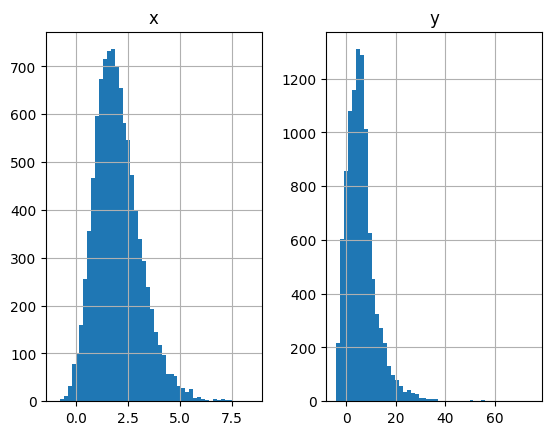

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(0)
N=10**4
normal=np.random.normal(size=(N,1))
gamma=np.random.gamma(shape=4,size=(N,1))
x=0.5*normal+0.5*gamma
y=x**2+1+np.random.uniform(-5,5,(N,1))
df=pd.DataFrame(np.concatenate((x,y),axis=1),columns=('x','y'))
df.hist(bins=50)

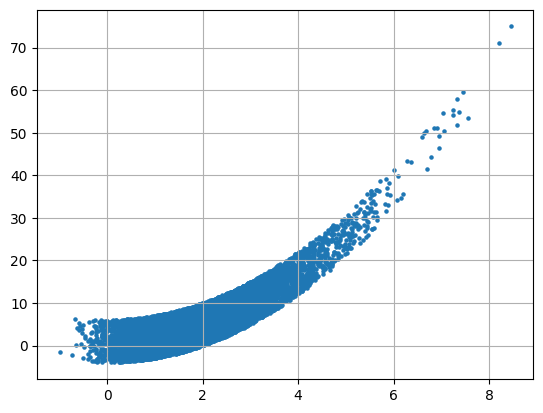

In [2]:
plt.scatter(df['x'],df['y'],s=5)
plt.grid()

# Intervalos de ancho constante

In [37]:
bins=10 # Queremos 10 categorías resultantes
rango=df.x.max()-df.x.min()
rango

9.44087648887959

In [4]:
intervalo=rango/bins
intervalo

0.944087648887959

In [5]:
# Primer categoría
df.x.min(),df.x.min()+intervalo

(-0.987565426531495, -0.043477777643536)

In [6]:
# Segunda categoría
df.x.min()+intervalo,df.x.min()+2*intervalo

(-0.043477777643536, 0.900609871244423)

In [7]:
df.x.max(),df.x.min()+10*intervalo

(8.453311062348096, 8.453311062348096)

In [8]:
intervalos=np.linspace(df.x.min(),df.x.max(),bins+1)
intervalos

array([-0.98756543, -0.04347778,  0.90060987,  1.84469752,  2.78878517,
        3.73287282,  4.67696047,  5.62104812,  6.56513576,  7.50922341,
        8.45331106])

In [9]:
intervalos=np.arange(df.x.min(),df.x.max()+intervalo,intervalo)
intervalos

array([-0.98756543, -0.04347778,  0.90060987,  1.84469752,  2.78878517,
        3.73287282,  4.67696047,  5.62104812,  6.56513576,  7.50922341,
        8.45331106])

In [10]:
# Separación de observaciones en contenedores
np.where(df.x[0]<=intervalos)

(array([ 4,  5,  6,  7,  8,  9, 10]),)

In [11]:
np.where(df.x[0]>=intervalos)

(array([0, 1, 2, 3]),)

In [12]:
# Discretización
contenedores = {}
df['Ayon'] = np.nan

for i in range(bins):
  lim_inf = intervalos[i]
  lim_sup = intervalos[i+1]
  contenedores[i] = df[(df.x >= lim_inf) & (df.x <= lim_sup)].index
  df.loc[contenedores[i],'Ayon'] = i

df

,x,y,Ayon
0,2.528576,5.715027,3.0
1,1.345772,6.059505,2.0
2,2.157677,1.057097,3.0
3,2.098807,3.013917,3.0
4,2.542341,7.103940,3.0
...,...,...,...
9995,1.431836,0.849904,2.0
9996,3.668942,12.652852,4.0
9997,3.028140,5.603071,4.0
9998,2.274101,9.633737,3.0


In [13]:
df.Ayon.value_counts()

,count
Ayon,
2.0,3453
3.0,2954
4.0,1461
1.0,1338
5.0,472
6.0,156
0.0,124
7.0,22
8.0,17


In [14]:
# Discretización (intervalos de ancho fijo)
pd.cut(df.x,bins=intervalos).value_counts()

,count
x,
"(0.901, 1.845]",3453
"(1.845, 2.789]",2954
"(2.789, 3.733]",1461
"(-0.0435, 0.901]",1338
"(3.733, 4.677]",472
"(4.677, 5.621]",156
"(-0.988, -0.0435]",123
"(5.621, 6.565]",22
"(6.565, 7.509]",17


In [38]:
# Discretización (intervalos de ancho constante)
pd.cut(df.x,bins=bins,include_lowest=True).value_counts()

,count
x,
"(0.901, 1.845]",3453
"(1.845, 2.789]",2954
"(2.789, 3.733]",1461
"(-0.0435, 0.901]",1338
"(3.733, 4.677]",472
"(4.677, 5.621]",156
"(-0.998, -0.0435]",124
"(5.621, 6.565]",22
"(6.565, 7.509]",17


# Regresión lineal

In [16]:
df.head()

,x,y,Ayon
0,2.528576,5.715027,3.0
1,1.345772,6.059505,2.0
2,2.157677,1.057097,3.0
3,2.098807,3.013917,3.0
4,2.542341,7.103940,3.0


In [22]:
# Codificación basada en la media
x=df.groupby('Ayon')['x'].mean()
x

,x
Ayon,
0.0,-0.231315
1.0,0.567046
2.0,1.391583
3.0,2.279548
4.0,3.192666
5.0,4.107065
6.0,5.059476
7.0,5.895442
8.0,7.006800


In [21]:
y=df.groupby('Ayon')['y'].mean()
y

,y
Ayon,
0.0,1.115945
1.0,1.427457
2.0,2.959433
3.0,6.219610
4.0,11.261839
5.0,17.963199
6.0,26.887784
7.0,36.074702
8.0,51.263717


In [24]:
rl_d=LinearRegression()
rl_d.fit(x.values.reshape(-1,1),y.values)

LinearRegression()

In [25]:
rl=LinearRegression()
rl.fit(df[['x']],df.y)

LinearRegression()

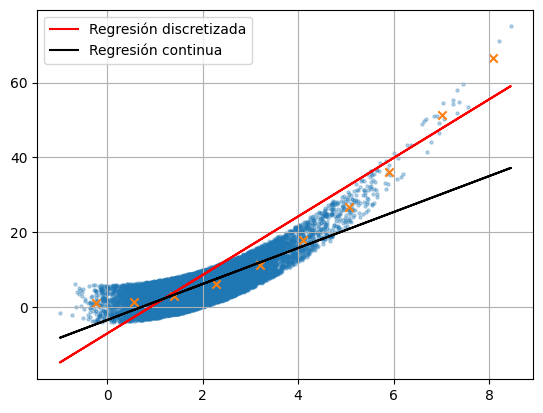

In [28]:
# Se modifica el modelo al usar únicamente los datos discretizados.
# Esto por imponer una ponderación equivalente a cada intervalo, independiente de la cantidad de observaciones
#
plt.scatter(df['x'],df['y'],s=5,alpha=0.3)

predict_disc=rl_d.predict(df[['x']].values)
plt.plot(df[['x']],predict_disc,color='red',label='Regresión discretizada')
plt.scatter(x,y,marker='x')

predict=rl.predict(df[['x']])
plt.plot(df['x'],predict,'k',label='Regresión continua')

plt.legend()
plt.grid()

<Axes: >

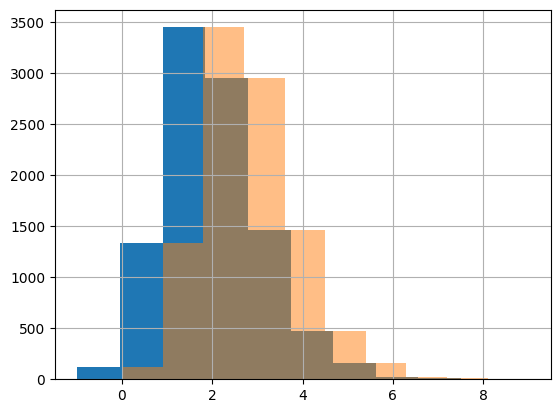

In [29]:
# Se conserva la distribución
#
df.x.hist()
df.Ayon.hist(alpha=0.5)

# Intervalos de frecuencia constante

In [31]:
bins=10 # Queremos 10 categorías resultantes
df.x.shape[0]/bins

1000.0

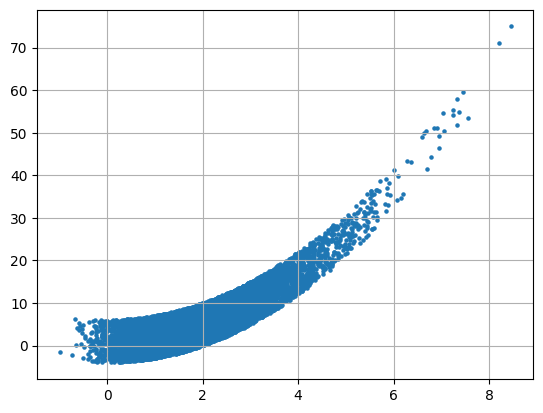

In [32]:
plt.scatter(df.x,df.y,s=5)
plt.grid()

In [33]:
pd.qcut(df.x,q=bins).value_counts()

,count
x,
"(-0.989, 0.713]",1000
"(0.713, 1.072]",1000
"(1.072, 1.348]",1000
"(1.348, 1.608]",1000
"(1.608, 1.866]",1000
"(1.866, 2.135]",1000
"(2.135, 2.461]",1000
"(2.461, 2.853]",1000
"(2.853, 3.439]",1000


In [34]:
# Discretización
df['frecuencia'] = pd.qcut(df.x,q=bins)
df.head()

,x,y,Ayon,frecuencia
0,2.528576,5.715027,3.0,"(2.461, 2.853]"
1,1.345772,6.059505,2.0,"(1.072, 1.348]"
2,2.157677,1.057097,3.0,"(2.135, 2.461]"
3,2.098807,3.013917,3.0,"(1.866, 2.135]"
4,2.542341,7.103940,3.0,"(2.461, 2.853]"


In [39]:
df.frecuencia.dtype

CategoricalDtype(categories=[(-0.989, 0.713],  (0.713, 1.072],  (1.072, 1.348],
                   (1.348, 1.608],  (1.608, 1.866],  (1.866, 2.135],
                   (2.135, 2.461],  (2.461, 2.853],  (2.853, 3.439],
                   (3.439, 8.453]],
, ordered=True, categories_dtype=interval[float64, right])

# Regresión lineal

<ipython-input-41-086cf1fb2a18>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_f=df.groupby('frecuencia')['x'].mean()
<ipython-input-41-086cf1fb2a18>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y_f=df.groupby('frecuencia')['y'].mean()


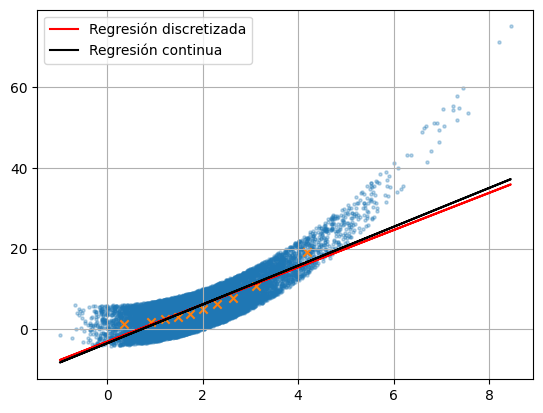

In [41]:
# Codificación basada en la media
x_f=df.groupby('frecuencia')['x'].mean()
y_f=df.groupby('frecuencia')['y'].mean()

# Regresión lineal
rl_f=LinearRegression()
rl_f.fit(x_f.values.reshape(-1,1),y_f.values)

plt.scatter(df['x'],df['y'],s=5,alpha=0.3)
plt.plot(df['x'],rl_f.predict(df.x.values.reshape(-1,1)),color='red',label='Regresión discretizada')
plt.scatter(x_f,y_f,marker='x')

plt.plot(df['x'],rl.predict(df[['x']]),'k',label='Regresión continua')

plt.legend()
plt.grid()

In [59]:
rl.coef_,rl_f.coef_

(array([4.80476724]), array([4.60247225]))

---
Comparaciones

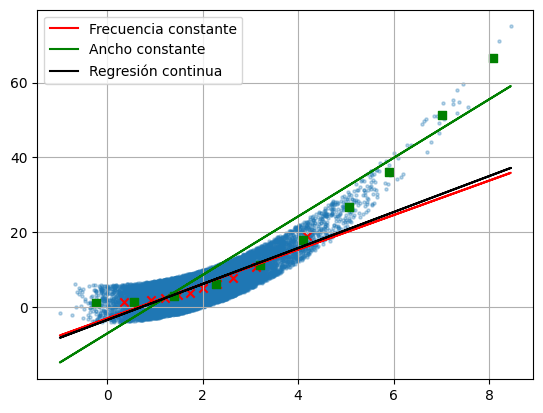

In [44]:
plt.scatter(df['x'],df['y'],s=5,alpha=0.3)

# Intervalos de frecuencia constante
plt.plot(df['x'],rl_f.predict(df.x.values.reshape(-1,1)),color='red',label='Frecuencia constante')
plt.scatter(x_f,y_f,marker='x',c='r')

# Intervalos de ancho constante
plt.plot(df['x'],rl_d.predict(df.x.values.reshape(-1,1)),'g',label='Ancho constante')
plt.scatter(x,y,marker='s',c='g')

plt.plot(df['x'],rl.predict(df[['x']]),'k',label='Regresión continua')

plt.legend()
plt.grid()

In [48]:
categorias=df.frecuencia.unique()

In [56]:
mapeo={categoria:valor for categoria,valor in zip(categorias.categories,range(bins))}
mapeo

{Interval(-0.989, 0.713, closed='right'): 0,
 Interval(0.713, 1.072, closed='right'): 1,
 Interval(1.072, 1.348, closed='right'): 2,
 Interval(1.348, 1.608, closed='right'): 3,
 Interval(1.608, 1.866, closed='right'): 4,
 Interval(1.866, 2.135, closed='right'): 5,
 Interval(2.135, 2.461, closed='right'): 6,
 Interval(2.461, 2.853, closed='right'): 7,
 Interval(2.853, 3.439, closed='right'): 8,
 Interval(3.439, 8.453, closed='right'): 9}

In [57]:
df['frecuencias']=df.frecuencia.map(mapeo)
df.head()

,x,y,Ayon,frecuencia,frecuencias
0,2.528576,5.715027,3.0,"(2.461, 2.853]",7
1,1.345772,6.059505,2.0,"(1.072, 1.348]",2
2,2.157677,1.057097,3.0,"(2.135, 2.461]",6
3,2.098807,3.013917,3.0,"(1.866, 2.135]",5
4,2.542341,7.103940,3.0,"(2.461, 2.853]",7


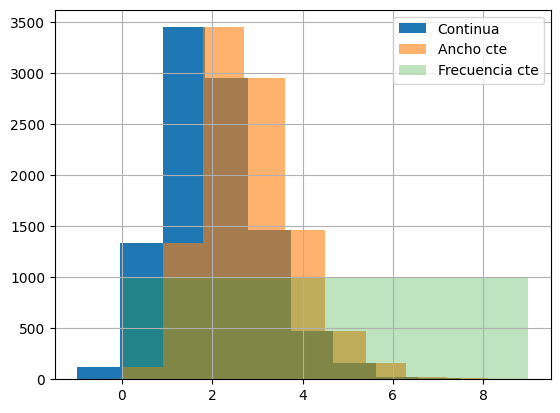

In [58]:
# Histogramas
df.x.hist(label='Continua')
df.Ayon.hist(label='Ancho cte',alpha=0.6)
df.frecuencias.hist(label='Frecuencia cte',alpha=0.3)
plt.legend()

Al usar la discretización por intervalos de ancho constante, conservamos la forma de la distribución mas modificamos el modelo; si esto último es deseable, lo que generamos es una ponderación equivalente entre intervalos, independientemente del número de observaciones.

Si usamos la discretización con intervalos de frecuencia constante, obtenemos un modelo bastante similar al de los datos sin discretizar, pero se pierde la forma de la distribución, resultando siempre en una Uniforme.